In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
file_path_1 = 'Netflix_cleaned_1.csv'
file_path_2 = 'Hulu_cleaned_1.csv'
df_netflix = pd.read_csv(file_path_1)
df_hulu = pd.read_csv(file_path_2)

In [4]:
df_netflix.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,20,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,8,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water


In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7465 entries, 0 to 7464
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7465 non-null   object 
 1   country          7465 non-null   object 
 2   date_added       7465 non-null   object 
 3   month            7465 non-null   int64  
 4   day              7465 non-null   int64  
 5   year             7465 non-null   int64  
 6   release_year     7465 non-null   int64  
 7   rating           7465 non-null   object 
 8   duration_min     4978 non-null   float64
 9   duration_season  2487 non-null   float64
 10  difference       7465 non-null   int64  
 11  continent        7465 non-null   object 
 12  country_cleaned  7465 non-null   object 
 13  duration         7465 non-null   object 
 14  listed_in        7465 non-null   object 
 15  description      7465 non-null   object 
 16  show_id          7465 non-null   object 
 17  director      

In [29]:
df_netflix['year'].describe()

count    7465.000000
mean     2018.855191
std         1.540906
min      2011.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: year, dtype: float64

In [6]:
df_hulu.head(2)

,type,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,country,duration,listed_in,description,show_id,director,cast,title
0,tv show,2021-10-15,10,15,2021,2012,tv-14,missing,1,117,north america,missing,united states,1 season,"documentaries, history",america's story can be told in many ways. whil...,s18,missing,NaN,america's book of secrets
1,tv show,2021-10-15,10,15,2021,2011,tv-14,missing,6,129,north america,missing,united states,6 seasons,"documentaries, reality, teen",beyond scared straight profiles the new approa...,s20,missing,NaN,beyond scared straight


In [7]:
df_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             894 non-null    object 
 1   date_added       894 non-null    object 
 2   month            894 non-null    int64  
 3   day              894 non-null    int64  
 4   year             894 non-null    int64  
 5   release_year     894 non-null    int64  
 6   rating           894 non-null    object 
 7   duration_min     894 non-null    object 
 8   duration_season  894 non-null    object 
 9   difference       894 non-null    int64  
 10  continent        894 non-null    object 
 11  country_cleaned  894 non-null    object 
 12  country          894 non-null    object 
 13  duration         894 non-null    object 
 14  listed_in        894 non-null    object 
 15  description      894 non-null    object 
 16  show_id          894 non-null    object 
 17  director        

In [8]:
genre_counts = {}
for row in df_hulu.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [9]:
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
genre_counts

{'drama': 284,
 'comedy': 221,
 'action': 183,
 'adventure': 179,
 'anime': 145,
 'documentaries': 135,
 'reality': 110,
 'horror': 88,
 'crime': 76,
 'international': 68,
 'family': 59,
 'sitcom': 57,
 'thriller': 55,
 'lifestyle & culture': 54,
 'black stories': 50,
 'romance': 45,
 'kids': 41,
 'science fiction': 32,
 'music': 27,
 'cooking & food': 23,
 'latino': 20,
 'history': 19,
 'mystery': 18,
 'adult animation': 18,
 'cartoons': 18,
 'teen': 14,
 'sports': 13,
 'lgbtq+': 11,
 'game shows': 8,
 'science & technology': 7,
 'news': 5,
 'health & wellness': 3,
 'late night': 2,
 'stand up': 1,
 'sketch comedy': 1}

In [10]:
genre_counts = {}
for row in df_netflix.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [11]:
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
genre_counts

{'international movies': 2303,
 'dramas': 1943,
 'international tv shows': 1283,
 'comedies': 1256,
 'documentaries': 817,
 'tv dramas': 730,
 'independent movies': 666,
 'action & adventure': 571,
 'tv comedies': 533,
 'children & family movies': 525,
 'thrillers': 489,
 'romantic movies': 475,
 'crime tv shows': 459,
 "kids' tv": 405,
 'docuseries': 372,
 'romantic tv shows': 343,
 'stand-up comedy': 314,
 'music & musicals': 295,
 'horror movies': 293,
 'reality tv': 249,
 'british tv shows': 233,
 'sports movies': 188,
 'spanish-language tv shows': 164,
 'sci-fi & fantasy': 164,
 'tv action & adventure': 152,
 'anime series': 149,
 'korean tv shows': 148,
 'tv mysteries': 96,
 'lgbtq movies': 95,
 'science & nature tv': 85,
 'tv horror': 74,
 'tv sci-fi & fantasy': 74,
 'teen tv shows': 62,
 'faith & spirituality': 58,
 'tv thrillers': 55,
 'stand-up comedy & talk shows': 54,
 'movies': 53,
 'anime features': 49,
 'classic & cult tv': 14,
 'tv shows': 10,
 'cult movies': 9,
 'class

In [12]:
def one_hot_genre(listed_in, genre):
    lst = list(set(listed_in.split(',')))
    for i in lst:
        if genre in i:
            return 1
    return 0

In [23]:
hulu_genres_df = df_hulu[['type', 'month', 'year', 'continent', 'listed_in']].copy()
net_genres_df = df_netflix[['type', 'month', 'year', 'continent', 'listed_in']].copy()
genre_list = ['international', 'drama', 'comed', 'action', 'docu', 'thriller', 'roman', 'anime']
for genre in genre_list:
    hulu_genres_df[genre] = hulu_genres_df['listed_in'].apply(lambda row: one_hot_genre(row, genre))
    net_genres_df[genre] = net_genres_df['listed_in'].apply(lambda row: one_hot_genre(row, genre))

In [24]:
hulu_genres_df

,type,month,year,continent,listed_in,international,drama,comed,action,docu,thriller,roman,anime
0,tv show,10,2021,north america,"documentaries, history",0,0,0,0,1,0,0,0
1,tv show,10,2021,north america,"documentaries, reality, teen",0,0,0,0,1,0,0,0
2,tv show,10,2021,north america,"black stories, reality",0,0,0,0,0,0,0,0
3,tv show,10,2021,north america,"documentaries, drama, mystery",0,1,0,0,1,0,0,0
4,tv show,10,2021,north america,"documentaries, reality",0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,tv show,2,2012,north america,drama,0,1,0,0,0,0,0,0
890,tv show,7,2011,asia,"action, adventure, anime",0,0,0,1,0,0,0,1
891,tv show,4,2011,asia,"action, adventure, anime",0,0,0,1,0,0,0,1
892,tv show,4,2011,asia,"action, adventure, anime",0,0,0,1,0,0,0,1


In [25]:
net_genres_df

,type,month,year,continent,listed_in,international,drama,comed,action,docu,thriller,roman,anime
0,movie,9,2021,north america,documentaries,0,0,0,0,1,0,0,0
1,tv show,9,2021,africa,"international tv shows, tv dramas, tv mysteries",1,1,0,0,0,0,0,0
2,tv show,9,2021,missing,"crime tv shows, international tv shows, tv act...",1,0,0,1,0,0,0,0
3,tv show,9,2021,missing,"docuseries, reality tv",0,0,0,0,1,0,0,0
4,tv show,9,2021,asia,"international tv shows, romantic tv shows, tv ...",1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,movie,12,2019,asia,"comedies, dramas, international movies",1,1,1,0,0,0,0,0
7461,tv show,12,2016,asia,"international tv shows, romantic tv shows, tv ...",1,1,0,0,0,0,1,0
7462,movie,3,2016,asia,"dramas, international movies, thrillers",1,1,0,0,0,1,0,0
7463,tv show,7,2019,missing,"kids' tv, korean tv shows, tv comedies",0,0,1,0,0,0,0,0


In [49]:
genre_map = {
    'international': 'International',
    'drama': 'Drama',
    'comed': 'Comedy', 
    'action': 'Action',
    'docu': 'Documentary',
    'thriller': 'Thriller',
    'roman': 'Romance',
    'anime': 'Anime'
}

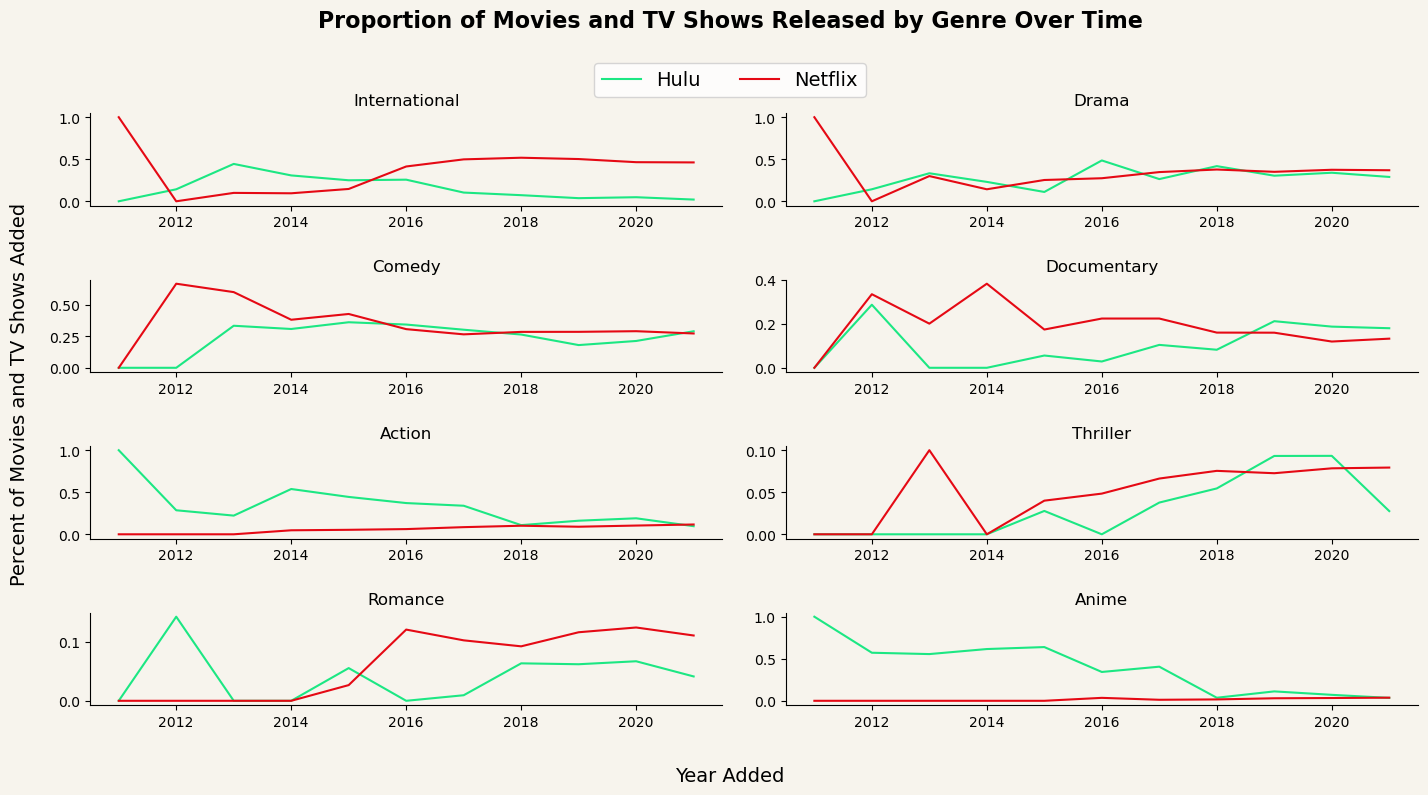

In [50]:
fig, ax = plt.subplots(figsize=(16,8), nrows=4, ncols=2)
ax_ind = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1]]
genre_list = ['international', 'drama', 'comed', 'docu', 'action', 'thriller', 'roman', 'anime']
for ind, genre in zip(ax_ind, genre_list):
    hulu_grouped = hulu_genres_df.groupby('year')[genre].mean()
    net_grouped = net_genres_df.groupby('year')[genre].mean()
    ax[ind[0], ind[1]].plot(hulu_grouped, color = '#1ce783', label='Hulu')
    ax[ind[0], ind[1]].plot(net_grouped, color = '#E50914', label='Netflix')
    ax[ind[0], ind[1]].set_title(genre_map[genre])
    ax[ind[0], ind[1]].spines['top'].set_visible(False)
    ax[ind[0], ind[1]].spines['right'].set_visible(False)
    ax[ind[0], ind[1]].set_facecolor(color='#f7f4ed')

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.47, 0.925), ncol=2, fontsize=14)
fig.suptitle('Proportion of Movies and TV Shows Released by Genre Over Time', weight='bold', x=0.47, ha='center', size=16)
fig.supxlabel('Year Added', x=0.47, ha='center', size=14)
fig.supylabel('Percent of Movies and TV Shows Added', size=14)
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.8)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.07)
plt.show()
    

In [51]:
colormap = {
    'international': '#ff595e',
    'drama': '#ffca3a',
    'comed': '#8ac926',
    'docu': '#1982c4',
    'anime': '#6a4c93'
}

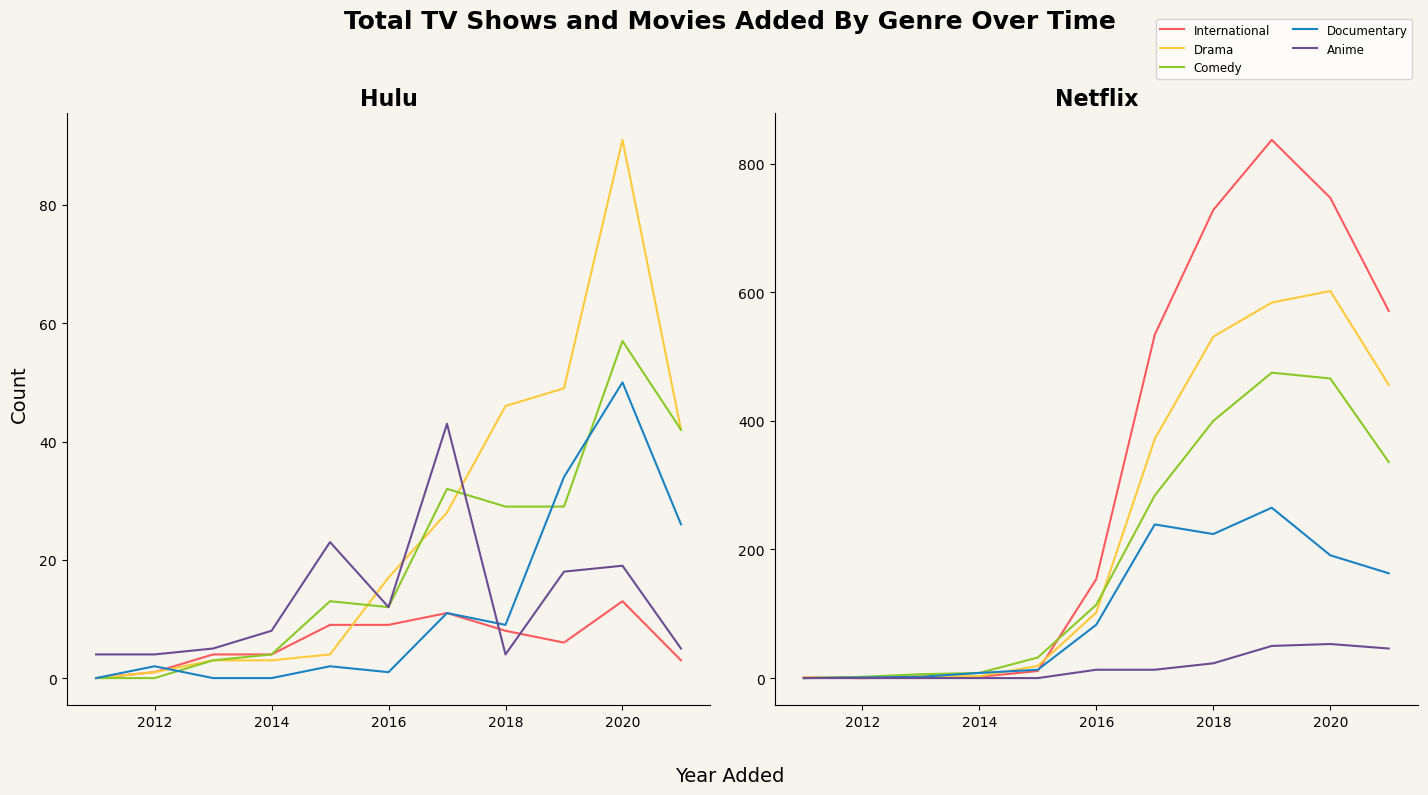

In [52]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
genre_list = ['international', 'drama', 'comed', 'docu', 'anime']
for genre in genre_list:
    hulu_grouped = hulu_genres_df.groupby('year')[genre].sum()
    net_grouped = net_genres_df.groupby('year')[genre].sum()
    ax[0].plot(hulu_grouped, color = colormap[genre], label=genre_map[genre])
    ax[1].plot(net_grouped, color = colormap[genre], label=genre_map[genre])

ax[0].set_title('Hulu', fontsize=16, weight='bold')
ax[1].set_title('Netflix', fontsize=16, weight='bold')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.9, 0.975), ncol=2, fontsize=8.5)
fig.suptitle('Total TV Shows and Movies Added By Genre Over Time', weight='bold', x=0.47, ha='center', size=18)
fig.supxlabel('Year Added', x=0.47, ha='center', size=14)
fig.supylabel('Count', size=14)
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.0555)
plt.show()